## Final Project Code for Data Parsing and SVM, RF, NB classifiers

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import os
import sys
from IPython.display import display, Image
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from six.moves import cPickle as pickle
from six.moves import range
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from timeit import default_timer as timer
# needed to see images
from IPython.display import display, Image

# Config the matlotlib backend as plotting inline in IPython
#%matplotlib inline

import tensorflow as tf
import time
import pickle
#import LoadData
import seaborn as sns
import librosa
current_palette = sns.color_palette()



In [2]:
# import 
import tarfile
t = tarfile.open('/Users/kasiemobimaduabunachukwu/Downloads/UrbanSound8K.tar.gz', mode="r:gz")
t.extractall()

In [3]:
raw_sound = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
raw_sound.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [4]:
import soundfile as sf
data, samplerate = sf.read('UrbanSound8K/audio/fold1/102106-3-0-0.wav')
print(data, samplerate)

[[-0.01174927  0.03039551]
 [-0.01153564  0.02471924]
 [-0.01644897  0.01794434]
 ..., 
 [-0.00588989  0.00012207]
 [ 0.00314331  0.00585938]
 [ 0.00540161  0.00689697]] 44100


In [5]:
fold_list = []
for i in range(1,11):
    fold_name = 'fold' + str(i)
    fold_list.append(fold_name)
print(fold_list)

['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9', 'fold10']


In [6]:
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wave
from scipy.fftpack import dct 

In [7]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

In [8]:
a,b,c,d,e = extract_feature('UrbanSound8K/audio/fold1/102106-3-0-0.wav')

In [9]:
print(a.shape,b.shape,c.shape,d.shape,e.shape)
print(a[0])
print(40+12+128+13)

(40,) (12,) (128,) (7,) (6,)
-253.201139054
193


In [10]:
from os import listdir
from os.path import isfile, join
mfcc_data = []
exception_count = 0

for i in range(10):
    mypath = 'UrbanSound8K/audio/'+ fold_list[i] + '/'
    files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    for f in files:
        try:
            fn = mypath + f
            mfccs,chroma,mel,contrast,tonnetz = extract_feature(fn)
            features = np.empty((0,193))
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
            features = np.vstack([features,ext_features])
            
        except:
            print(f)
            exception_count += 1
            continue

        l_row = raw_sound.loc[raw_sound['slice_file_name']==f].values.tolist()
        label = l_row[0][-1]
        class_id = l_row[0][-2]
        fold = i+1
    
        mfcc_data.append([features, features.shape, class_id, label, fold])
        
            #print(f,old_samplerate,ss)
        
print("Exceptions: ", exception_count)

.DS_Store


/Users/kasiemobimaduabunachukwu/tensorflow/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


.DS_Store


/Users/kasiemobimaduabunachukwu/tensorflow/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


.DS_Store
.DS_Store


/Users/kasiemobimaduabunachukwu/tensorflow/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


.DS_Store


/Users/kasiemobimaduabunachukwu/tensorflow/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


.DS_Store


/Users/kasiemobimaduabunachukwu/tensorflow/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


.DS_Store


/Users/kasiemobimaduabunachukwu/tensorflow/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


.DS_Store
.DS_Store
.DS_Store
Exceptions:  10


In [15]:
pickle.dump(mfcc_data, open('feature_data1.p',"wb"))

In [16]:
mfcc_pd = pickle.load(open('feature_data1.p',"rb"))

In [17]:
cols=["features", "shape","label_id", "label", "fold"]
mfcc_pd = pd.DataFrame(data = mfcc_pd, columns=cols)

In [18]:
mfcc_pd.head()

features     shape  label_id  \
0  [[-402.458131222, 92.2208198393, 19.3559458953...  (1, 193)         3   
1  [[-366.481581922, 126.422493153, 31.1635153803...  (1, 193)         3   
2  [[-421.545181629, 69.0278123077, 11.2546785074...  (1, 193)         3   
3  [[-253.201139054, 99.422307006, -42.0187279331...  (1, 193)         3   
4  [[-383.810140281, 128.451555696, 29.3132434931...  (1, 193)         6   

      label  fold  
0  dog_bark     1  
1  dog_bark     1  
2  dog_bark     1  
3  dog_bark     1  
4  gun_shot     1

In [19]:
labels = set(mfcc_pd['label'])
print(labels)
cnt = [[label,list(mfcc_pd['label']).count(label)] for label in labels]
dict_cnt = dict(cnt)
dict_cnt

{'jackhammer', 'street_music', 'drilling', 'engine_idling', 'car_horn', 'gun_shot', 'siren', 'air_conditioner', 'children_playing', 'dog_bark'}


{'air_conditioner': 1000,
 'car_horn': 429,
 'children_playing': 1000,
 'dog_bark': 1000,
 'drilling': 1000,
 'engine_idling': 1000,
 'gun_shot': 374,
 'jackhammer': 1000,
 'siren': 929,
 'street_music': 1000}

In [20]:
cnt_cols=["classes","occurence"]
count_pd = pd.DataFrame(data = cnt, columns=cnt_cols)

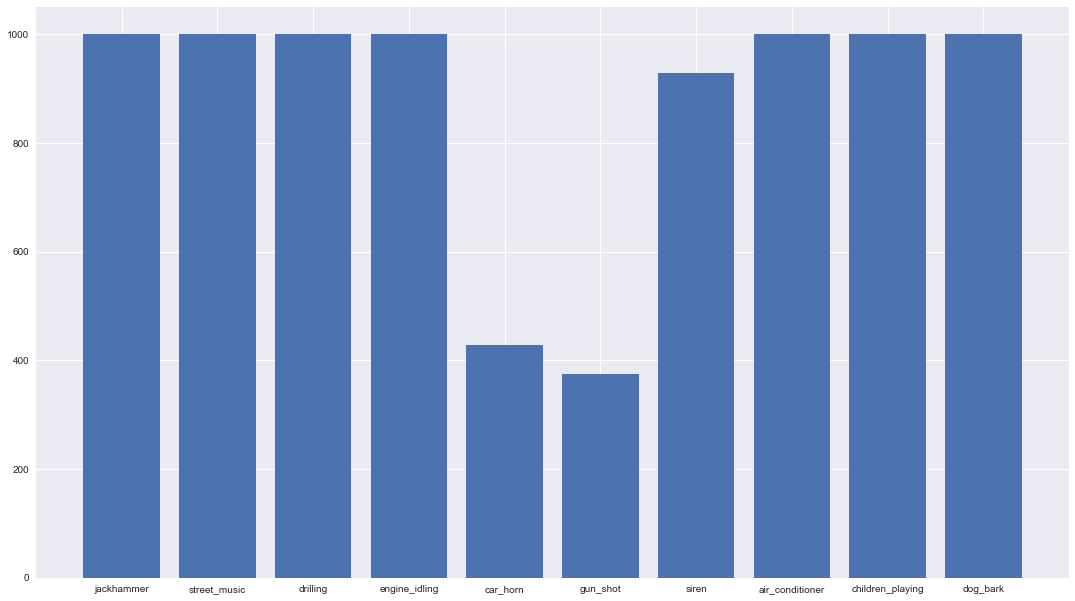

In [21]:
#dictionary = plt.figure()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

fig.set_size_inches(18.5, 10.5, forward=True)
plt.bar(range(len(dict_cnt)), dict_cnt.values(), align='center')
plt.xticks(range(len(dict_cnt)), dict_cnt.keys())
plt.show()
#plot_url = py.plot_mpl(dictionary, filename='mpl-dictionary')


In [22]:
labels = set(mfcc_pd['label_id'])
mapping = []
for label_id in labels:
    
    label_name = set(mfcc_pd.loc[mfcc_pd['label_id'] == label_id]['label'])
    mapping.append((label_id,label_name))
label_mapping = dict(mapping)
label_mapping

{0: {'air_conditioner'},
 1: {'car_horn'},
 2: {'children_playing'},
 3: {'dog_bark'},
 4: {'drilling'},
 5: {'engine_idling'},
 6: {'gun_shot'},
 7: {'jackhammer'},
 8: {'siren'},
 9: {'street_music'}}

In [23]:
ll = [mfcc_pd['features'][i].ravel() for i in range(mfcc_pd.shape[0])]
mfcc_pd['sample'] = pd.Series(ll, index=mfcc_pd.index)
del mfcc_pd['features']

In [24]:
#http://www.practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/
#http://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html

In [25]:
# Random Forest classifier. Use fold10 as test set. Use fold1-9 for 9-fold cross validation
forest = OneVsRestClassifier(RandomForestClassifier(n_estimators = 500, max_depth=20, min_samples_leaf=30))

In [26]:
train_data = np.array(list(mfcc_pd.loc[mfcc_pd['fold'] < 9]['sample']))
train_label = np.array(mfcc_pd.loc[mfcc_pd['fold'] < 9]['label_id'])
validation_data = np.array(list(mfcc_pd.loc[mfcc_pd['fold'] == 9]['sample']))
validation_label = np.array(mfcc_pd.loc[mfcc_pd['fold'] == 9]['label_id'])
#test_data = np.array(list(mfcc_pd.loc[mfcc_pd['fold'] == 10]['sample']))
#test_label = np.array(mfcc_pd.loc[mfcc_pd['fold'] == 10]['label_id'])

In [27]:
print(train_data.shape)
print(type(train_data))

(7079, 193)
<class 'numpy.ndarray'>


In [28]:
np.mean(train_data[0])

0.74981576454681398

In [29]:
forestmodel = forest.fit(train_data, train_label)

In [30]:
prediction = forestmodel.predict(validation_data)

In [31]:
prob_pred = forestmodel.predict_proba(validation_data)

In [32]:
prob_pred[0]

array([ 0.11401266,  0.00953543,  0.04815519,  0.02705347,  0.4100123 ,
        0.0807118 ,  0.03146236,  0.21806257,  0.02448702,  0.03650719])

In [33]:
np.sum(prediction == validation_label)/validation_label.shape[0]

0.61887254901960786

In [34]:
def confusion(true, predicted):
    matrix = np.zeros([10,10])
    #d = 0
    for t, p in zip(true, predicted):
        matrix[t,p] += 1.5
    #    d += 1
    #print(d)
    return matrix

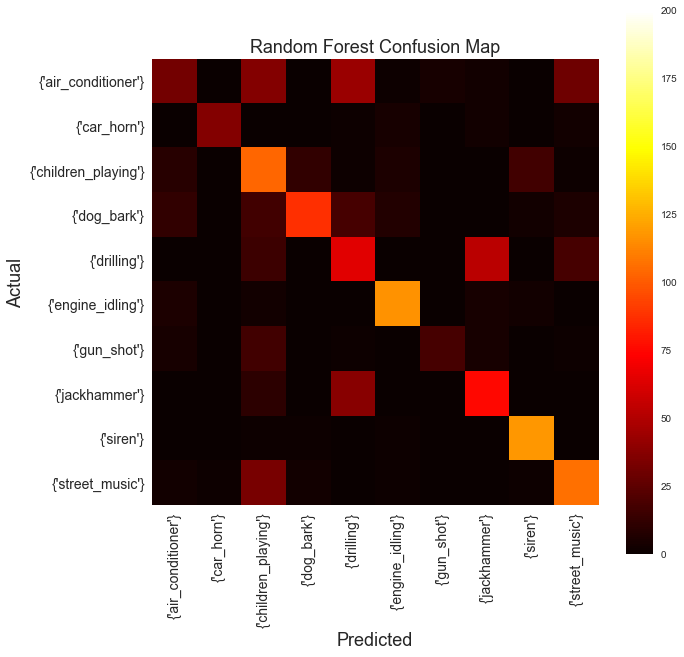

In [35]:
classe_names = label_mapping.values()
matrix = confusion(validation_label, prediction)

plt.figure(figsize=[10,10])
plt.imshow(matrix, cmap='hot', interpolation='nearest',  vmin=0, vmax=200)
plt.colorbar()
plt.title('Random Forest Confusion Map', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.xlabel('Predicted', fontsize=18)
plt.grid(b=False)
plt.yticks(range(10), classe_names, fontsize=14)
plt.xticks(range(10), classe_names, fontsize=14, rotation='vertical')
plt.show()

In [36]:
from sklearn.svm import NuSVC
from sklearn.svm import SVC

In [37]:
svm = OneVsRestClassifier(NuSVC(nu=.08, kernel='poly', decision_function_shape='ovr'))
svmmodel = svm.fit(train_data, train_label)

In [38]:
svc_prediction = svmmodel.predict(validation_data)

In [39]:
svc_accuracy = np.sum(svc_prediction == validation_label)/validation_label.shape[0]
svc_accuracy

0.59926470588235292

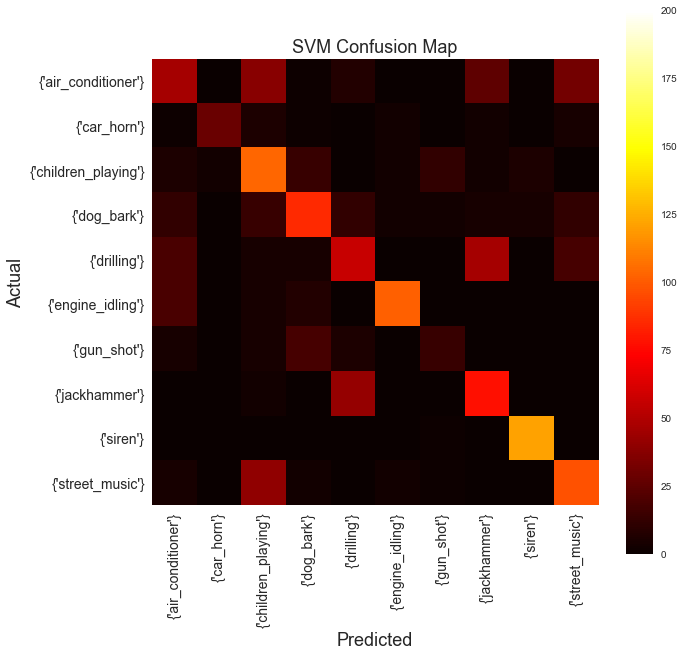

In [40]:
classe_names = label_mapping.values()
matrix = confusion(validation_label, svc_prediction)

plt.figure(figsize=[10,10])
plt.imshow(matrix, cmap='hot', interpolation='nearest',  vmin=0, vmax=200)
plt.colorbar()
plt.title('SVM Confusion Map', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.xlabel('Predicted', fontsize=18)
plt.grid(b=False)
plt.yticks(range(10), classe_names, fontsize=14)
plt.xticks(range(10), classe_names, fontsize=14, rotation='vertical')
plt.show()

In [41]:
NB = OneVsRestClassifier(GaussianNB())
nbmodel = NB.fit(train_data, train_label)

In [42]:
NB_prediction = nbmodel.predict(validation_data)

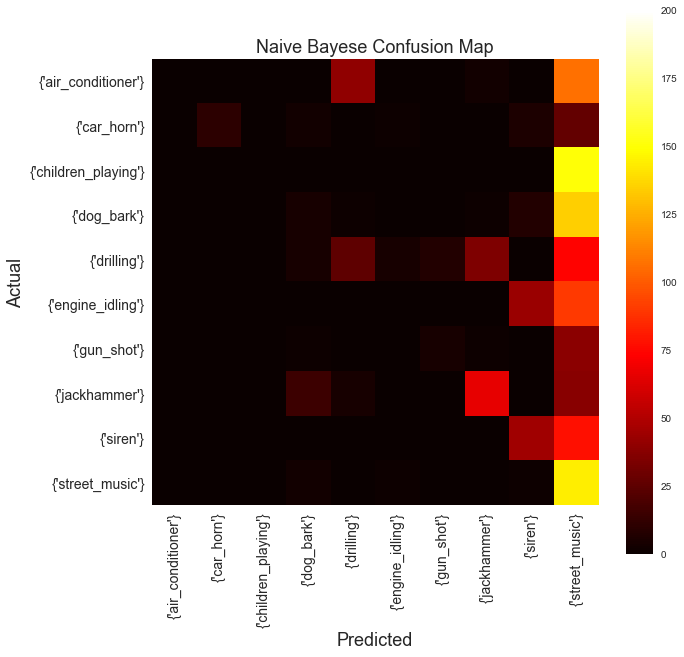

In [43]:
classe_names = label_mapping.values()
matrix = confusion(validation_label, NB_prediction)

plt.figure(figsize=[10,10])
plt.imshow(matrix, cmap='hot', interpolation='nearest',  vmin=0, vmax=200)
plt.colorbar()
plt.title('Naive Bayese Confusion Map', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.xlabel('Predicted', fontsize=18)
plt.grid(b=False)
plt.yticks(range(10), classe_names, fontsize=14)
plt.xticks(range(10), classe_names, fontsize=14, rotation='vertical')
plt.show()

In [44]:
nb_accuracy = np.sum(NB_prediction == validation_label)/validation_label.shape[0]
nb_accuracy

0.24509803921568626

In [45]:
const_shape = pickle.load(open('const_shape.p','rb'))

In [46]:
const_shape.head()

0           1          2          3          4         5  \
0 -303.665214  175.674805  -0.909009 -22.381963   0.168827 -4.858560   
1 -347.708961  190.784639  47.382200 -43.525568 -12.407683  5.094730   
2 -221.618954  182.523961  14.075528   1.103653 -18.543893 -1.274622   
3 -186.991836  153.742641 -69.260622 -31.808085  -7.238316  3.339198   
4 -478.384551  163.901951  40.952569  12.116725   7.309964 -1.079614   

           6          7          8          9  ...         812        813  \
0 -36.412949 -29.090563 -24.699204 -25.110877  ...   13.034615   4.838418   
1 -47.564077 -29.293994 -30.747255  -1.472716  ...    3.514627  -2.596958   
2 -30.537660 -11.242536 -13.128010  -5.913963  ...   -1.487615   3.141583   
3  -3.904681 -11.158155   0.245385   9.296590  ...   18.228318  21.316016   
4 -10.135202   8.479305   4.288644   5.266921  ...    4.777347   8.632009   

         814        815        816        817        818        819     label  \
0 -14.927127 -22.080391  -8.793089   3.785474  -0.751638  -9.906296  dog_bark   
1  -5.264056  -7.565407  -8.784303  -2.059884   5.848355   2.300709  dog_bark   
2   7.112016   5.410804  -0.278725  -2.883559   0.067862   4.165906  dog_bark   
3  -0.333578 -12.468618 -14.992194 -14.915432 -10.066552   3.212815  dog_bark   
4   6.367369   7.084391   3.348874  11.240836   6.784668  12.945714  gun_shot   

   fold  
0     1  
1     1  
2     1  
3     1  
4     1  

[5 rows x 822 columns]

In [47]:
const_shape['label_id'] = mfcc_pd['label_id']

In [48]:
const_shape[:10]

0           1          2          3          4          5  \
0 -303.665214  175.674805  -0.909009 -22.381963   0.168827  -4.858560   
1 -347.708961  190.784639  47.382200 -43.525568 -12.407683   5.094730   
2 -221.618954  182.523961  14.075528   1.103653 -18.543893  -1.274622   
3 -186.991836  153.742641 -69.260622 -31.808085  -7.238316   3.339198   
4 -478.384551  163.901951  40.952569  12.116725   7.309964  -1.079614   
5 -387.770710  109.951305  49.255936  38.467465   2.528642   9.948881   
6 -384.207593   99.981214  14.763002   8.292791  -0.177109  15.759701   
7 -328.896910  141.462109  12.506944  -2.171325  -3.021739  -1.802165   
8 -398.435279   81.915434  14.115991  20.962687   4.089972   6.101887   
9 -143.506405   61.503398 -12.527700  13.266649 -26.532538   4.503382   

           6          7          8          9    ...           813        814  \
0 -36.412949 -29.090563 -24.699204 -25.110877    ...      4.838418 -14.927127   
1 -47.564077 -29.293994 -30.747255  -1.472716    ...     -2.596958  -5.264056   
2 -30.537660 -11.242536 -13.128010  -5.913963    ...      3.141583   7.112016   
3  -3.904681 -11.158155   0.245385   9.296590    ...     21.316016  -0.333578   
4 -10.135202   8.479305   4.288644   5.266921    ...      8.632009   6.367369   
5   0.039392  -0.743910 -13.335413  -4.134461    ...      6.101377  12.266537   
6  -2.766530  -8.922327 -12.455066   7.893366    ...      6.810432   6.669972   
7 -18.337903  -5.792387 -10.054640   0.593087    ...     12.060055   9.713478   
8   2.727284   3.856556 -12.476839   4.479104    ...     15.915244  13.800272   
9 -10.030729   4.595740  -0.237721  -3.930845    ...     16.876905   0.940126   

         815        816        817        818        819       label  fold  \
0 -22.080391  -8.793089   3.785474  -0.751638  -9.906296    dog_bark     1   
1  -7.565407  -8.784303  -2.059884   5.848355   2.300709    dog_bark     1   
2   5.410804  -0.278725  -2.883559   0.067862   4.165906    dog_bark     1   
3 -12.468618 -14.992194 -14.915432 -10.066552   3.212815    dog_bark     1   
4   7.084391   3.348874  11.240836   6.784668  12.945714    gun_shot     1   
5  13.674683   2.599425   8.743840  -1.755183   6.510044    dog_bark     1   
6  12.928725  -7.550032  -6.357872 -11.969550  -4.121913    dog_bark     1   
7   6.872621  -8.503142   0.705280  -7.080760  -6.459029    dog_bark     1   
8   4.789974  -8.039799  -2.572644   1.633845   5.993840    dog_bark     1   
9   4.152211  -3.786278  -1.187238  -6.319164   7.156577  jackhammer     1   

   label_id  
0         3  
1         3  
2         3  
3         3  
4         6  
5         3  
6         3  
7         3  
8         3  
9         7  

[10 rows x 823 columns]

In [49]:
const_shape.fold = const_shape.fold.astype(np.int64)

In [50]:
type(const_shape['label_id'][0])

numpy.int64

In [51]:
const_train_data = const_shape.loc[const_shape['fold'] < 9]
del const_train_data['label']
del const_train_data['fold']
del const_train_data['label_id']
const_train_data = np.array(const_train_data)

const_validation_data = const_shape.loc[const_shape['fold'] == 9]
del const_validation_data['label']
del const_validation_data['fold']
del const_validation_data['label_id']
const_validation_data = np.array(const_validation_data)

const_train_label = np.array(const_shape.loc[const_shape['fold'] < 9]['label_id'])
const_validation_label = np.array(const_shape.loc[const_shape['fold'] == 9]['label_id'])


In [52]:
print(const_train_data.shape)
print(type(const_train_data))

(7079, 820)
<class 'numpy.ndarray'>


In [53]:
#svm_const = OneVsRestClassifier(NuSVC(nu=.08, kernel='poly', decision_function_shape='ovr',verbose = 2))
svm_const = OneVsRestClassifier(SVC(kernel='poly', decision_function_shape='ovr',verbose = 2))
svmmodel = svm_const.fit(const_train_data, const_train_label)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [54]:
print(svmmodel.predict(const_validation_data)[:100])

[4 9 4 4 9 9 9 2 9 2 2 9 2 9 9 9 4 9 4 2 4 2 4 4 2 4 4 8 5 2 2 5 2 8 5 5 5
 5 5 2 8 5 5 5 5 8 5 7 7 7 7 7 7 4 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 4 4 5 6]


In [55]:
const_svc_prediction = svmmodel.predict(const_validation_data)
svm_accuracy = np.sum(const_svc_prediction[:816] == const_validation_label[:816])/816
#validation_label.shape[0]
svm_accuracy

0.43872549019607843

In [56]:
svm_accuracy = np.sum(const_svc_prediction[:500] == const_validation_label[:500])
#validation_label.shape[0]
svm_accuracy

233

In [57]:
validation_label.shape[0]

816

In [85]:
forest = OneVsRestClassifier(RandomForestClassifier(n_estimators = 500, max_depth=20, min_samples_leaf=30))

In [86]:
const_forestmodel = forest.fit(const_train_data, const_train_label)

In [87]:
cf_prediction = const_forestmodel.predict(const_validation_data)

In [88]:
np.sum(cf_prediction[:816] == const_validation_label[:816]) /const_validation_label.shape[0]

0.45343137254901961

In [89]:
NB = OneVsRestClassifier(GaussianNB())
const_nbmodel = NB.fit(const_train_data, const_train_label)

In [90]:
nb_prediction = const_nbmodel.predict(const_validation_data)

In [91]:
np.sum(nb_prediction[:816] == const_validation_label[:816]) /const_validation_label.shape[0]

0.40441176470588236